In [47]:
# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries are Machine Learning Algorithm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
# For better understanding and flow of analysis, i will rename some of the columns
df.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate_achieved", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia", "target"]
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# Data verification - Data type, number of features and rows, missing data, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [51]:
# Statistical Analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
# Check for missing data
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

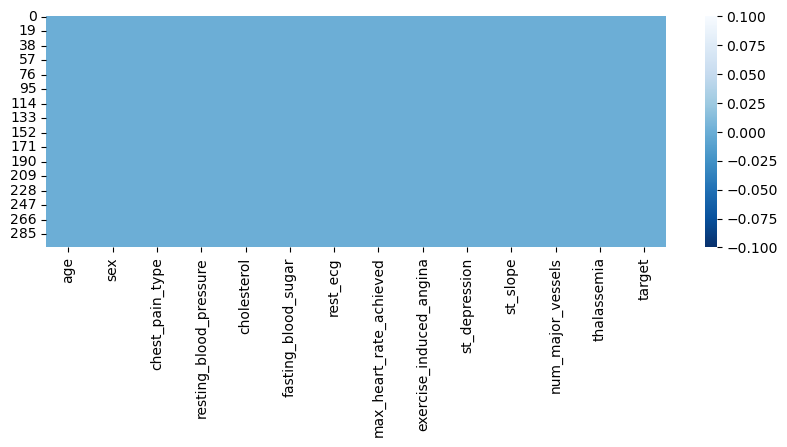

In [53]:
# Another method to investigate missing data is through visualization
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

## Exploratory Data Analysis

## Univariate Analysis

In [54]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

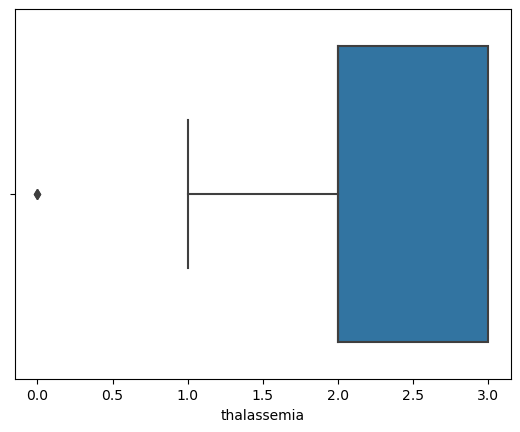

In [9]:
# Check for outliers
sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

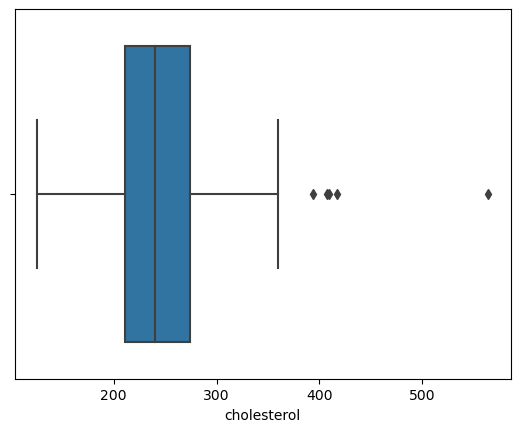

In [10]:
sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

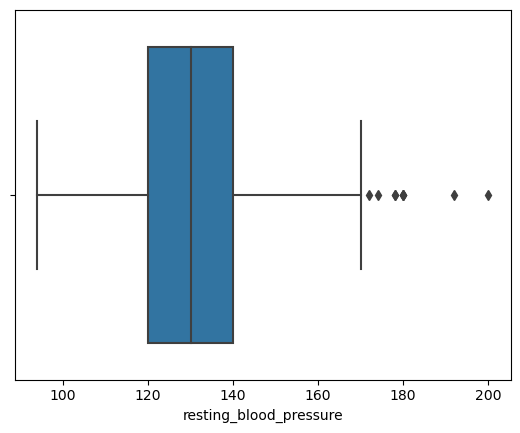

In [11]:
sns.boxplot(x=df["resting_blood_pressure"])

<Axes: xlabel='max_heart_rate_achieved'>

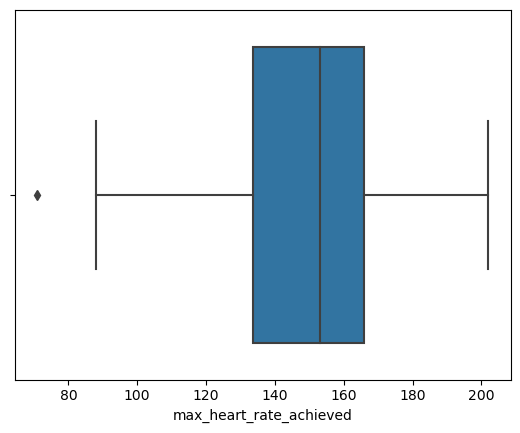

In [12]:
sns.boxplot(x=df["max_heart_rate_achieved"])

In [13]:
# Data Visualization
# Age_bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
df["age_bracket"] = df["age"].apply(age_bracket)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65)


Text(0.5, 1.0, 'Total Number of Patients')

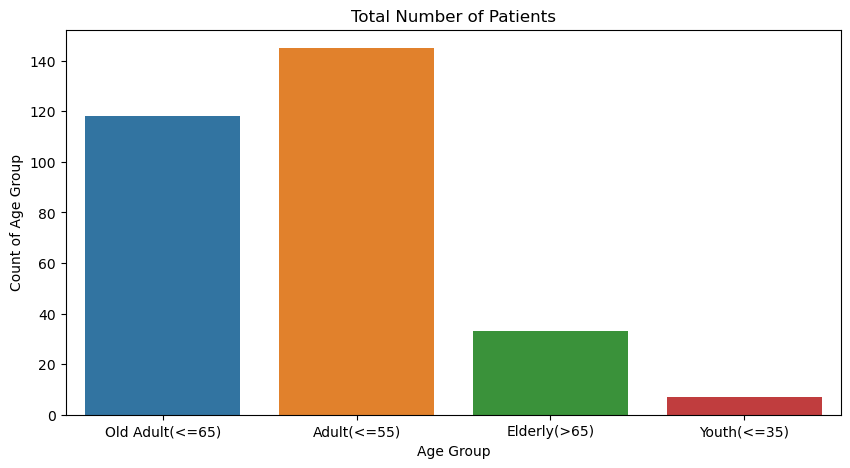

In [14]:
# Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x="age_bracket", data=df)
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients")


# Observations
* The plot above visualizes that Adult (<=55) has the highest number of patients with heart disease.

* The youth (<= 35) has the lowest.

* The Elderly(>65) shows a minimum figure of elderly people with heart disease.


In [15]:
# Data Visualization for Sex
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
    
df["gender"] = df["sex"].apply(gender)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


Text(0.5, 1.0, 'Total Number of Patients')

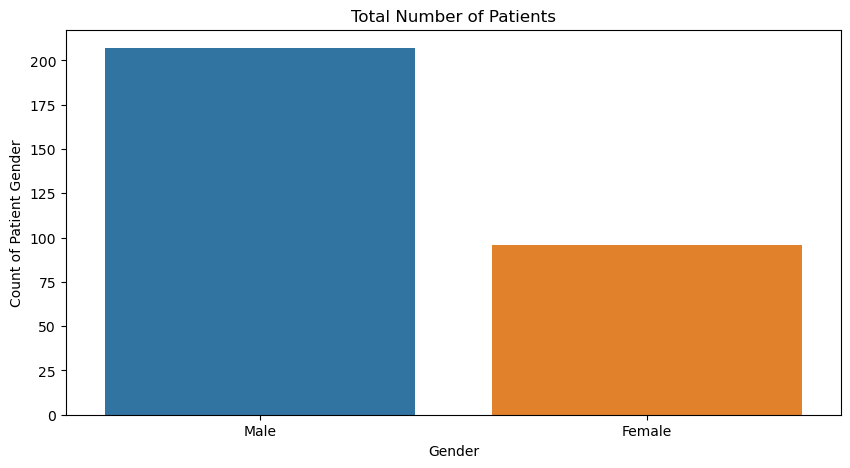

In [16]:
# Investigating the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x="gender", data=df)
plt.xlabel("Gender")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")

## Observations

 The male gender tend to have more heart disease compare to the female gender

In [17]:
# Data Visualization for Chest Pain
# Chest pain type (1: typical angina, 2: atypical angina, 3: non-angina pain, 4: asymptomatic)
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-angina pain"
    else:
        return "asymptomatic"
    
df["cp_cat"] = df["chest_pain_type"].apply(chest_pain)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic


Text(0.5, 1.0, 'Total Number of Patients')

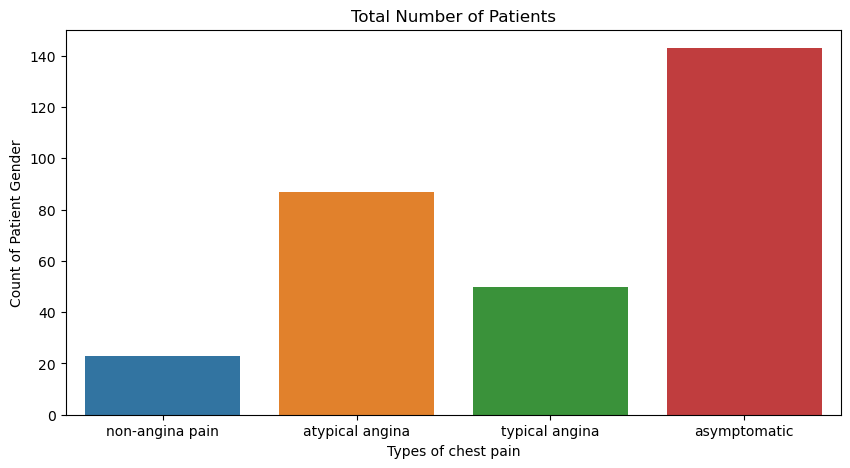

In [18]:
# Investigating the types of chest pain
plt.figure(figsize = (10,5))
sns.countplot(x="cp_cat", data=df)
plt.xlabel("Types of chest pain")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")

# Observation

* The plot visualizes that asymptomatic tends to be the most common chest pain, follow by the atypical angina

* The non-angina pain is the lowest kind of chest pain.


In [19]:
# Data Visualization for Target
# have disease or not (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df["label"] = df["target"].apply(label)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [20]:
# Total patient in each category
(df["label"].value_counts())

label
Yes    165
No     138
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Number of Patients')

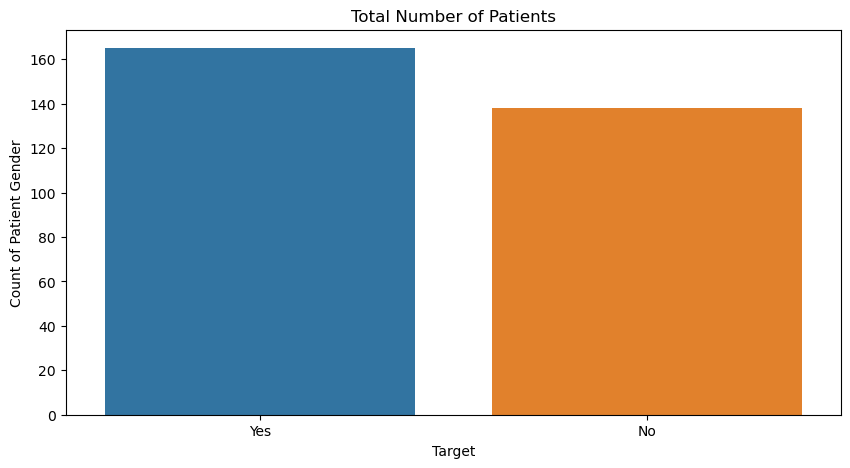

In [21]:
# Investigating the types of chest pain
plt.figure(figsize = (10,5))
sns.countplot(x="label", data=df)
plt.xlabel("Target")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")

### Bivariate Analysis


Text(0.5, 1.0, 'Total Number of Patients')

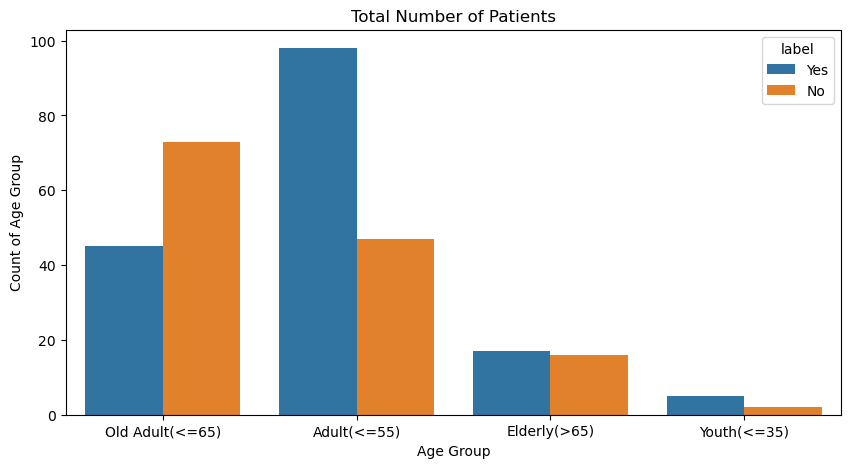

In [22]:
# Investigating the age group of patients by the target feature
plt.figure(figsize = (10,5))
sns.countplot(x="age_bracket", data=df, hue = "label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients")

# Observations
* From the visualization, Old Adult (<=65) tend to have highest number of patients without heart disease.
* The Elderly(>65) tend to have almost the same number of patients with heart disease and without heart disease
* The Adult(<=55) tend to have the highest number of patients with heart disease.
* The Youth(<=35) has the lowest number of patients.

Text(0.5, 1.0, 'Total Number of Patients')

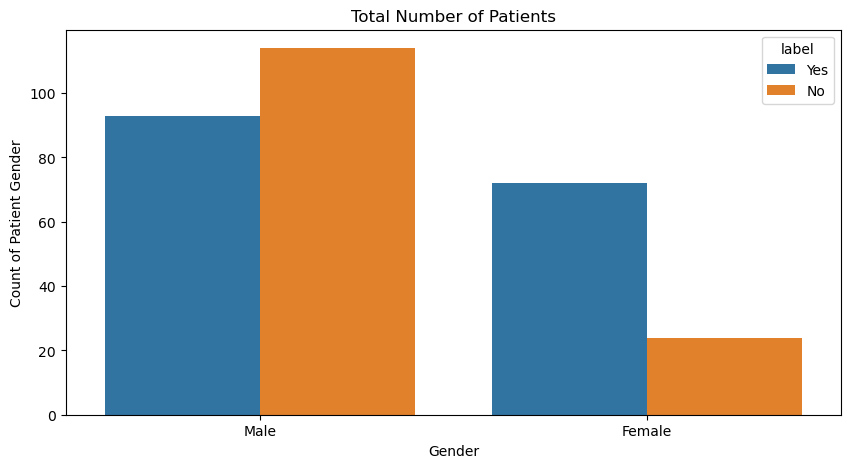

In [23]:
# Investigating the gender of patients by the target feature
plt.figure(figsize = (10,5))
sns.countplot(x="gender", data=df, hue = "label")
plt.xlabel("Gender")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")

# Observations
* From the plot above, the total number of male without heart disease is much higher than with heart disease
* The female counterpart has higher number of patients with heart disease.

Text(0.5, 1.0, 'Total Number of Patients')

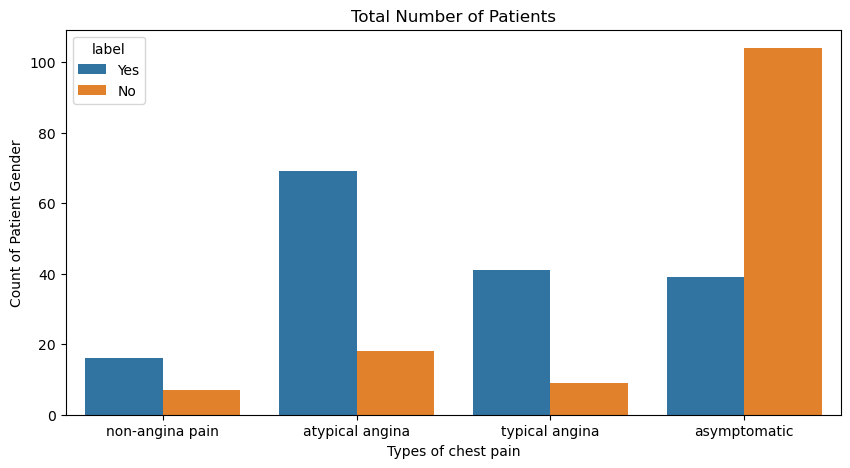

In [24]:
# Investigating the chest pain type by the target feature
plt.figure(figsize = (10,5))
sns.countplot(x="cp_cat", data=df, hue ="label")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients")

# Observations
* From the visualization, larger number of patients tend to have atypical angina chest pain
* As well as the asymptomatic chest pain larger number of patients tend not to have these types of chest pain.
* Lower number of patients tend to have non-angina pain type,as well as lower number of patients tend to have not non-angina pain type.

### Multivariate Analysis

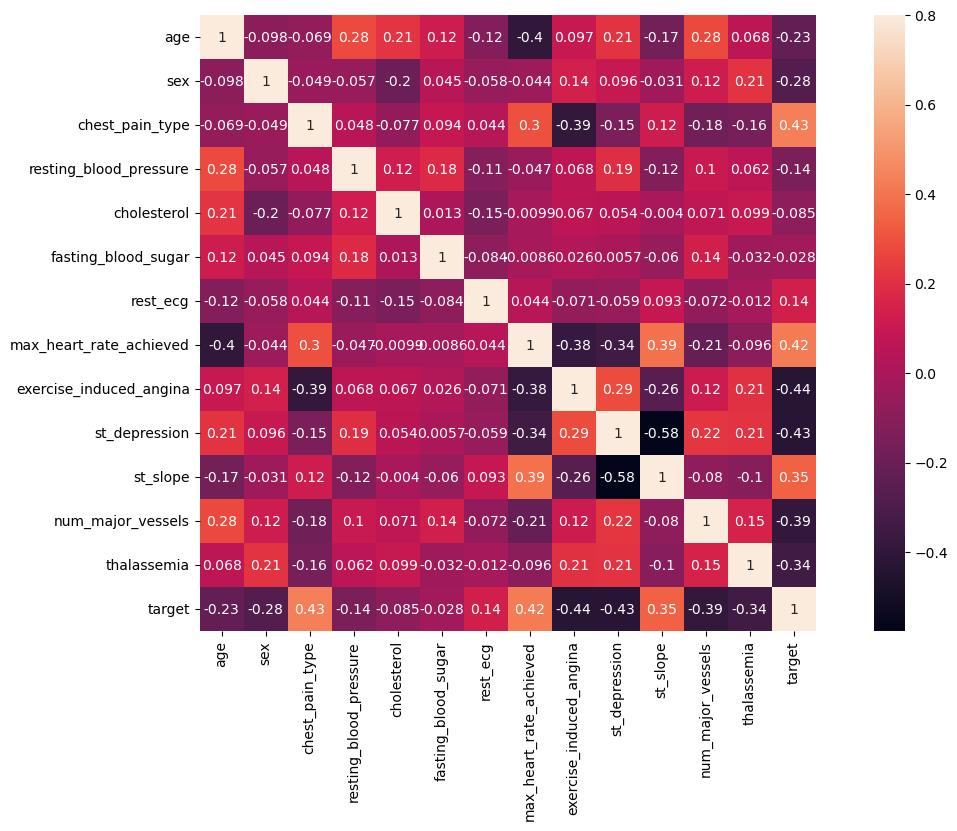

In [74]:
# Correlation

numeric_data = df.select_dtypes(include="number")
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True);



# Observations
* Moderate Positive Correlations:
    Chest pain type and Target: A moderate positive correlation of 0.43, indicates that there a larger percentage of patient with particular chest pain type.
    max_heart_rate_achieved and st_slope : Another moderate positive correlation of 0.39 here indicates that the patient tend to achieve a higher maximum heart rate.
    
* Strong Negative Correlations:
    thalassemia and target: An interesting negative correlation (-0.34) exists between thalassemia and the target variable (likely indicating heart disease presence/absence).
    


### Feature Engineering/ Data pre-processing

In [26]:
# Create a copy of the data (Exclude target/label alongside other columns that was created)

df1 = df[["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate_achieved", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia"]]

label = df[["target"]]

In [27]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [29]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [30]:
# Dealing with Outliers - "resting_blood_pressure", "cholesterol", "thalassemia"

# Normalize the data

scalar = MinMaxScaler()

df1["Scaled_RBP"] = scalar.fit_transform(df1["resting_blood_pressure"].values.reshape(-1, 1))
df1["Scaled_chol"] = scalar.fit_transform(df1["cholesterol"].values.reshape(-1, 1))
df1["Scaled_thal"] = scalar.fit_transform(df1["thalassemia"].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scalar.fit_transform(df1["max_heart_rate_achieved"].values.reshape(-1, 1))

df1.drop(["resting_blood_pressure","cholesterol","thalassemia","max_heart_rate_achieved"], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [35]:
# Split the dataset into training and testing sets - X = Questions, y = Answers
# X_train : is the practice question
# y_train : is the answer to those practice question
# X_test : is the exam itself
# y_test : is for the examiner ( the examiner has the marking script)

# X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)



In [32]:
df1.shape

(303, 13)

In [33]:
label.shape

(303, 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [38]:
X_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [39]:
y_train.head(3)

,target
132,1
202,0
196,0


In [56]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


In [42]:
X_test

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0.481132,0.356164,1.000000,0.541985


In [43]:
ly_pred 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [44]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


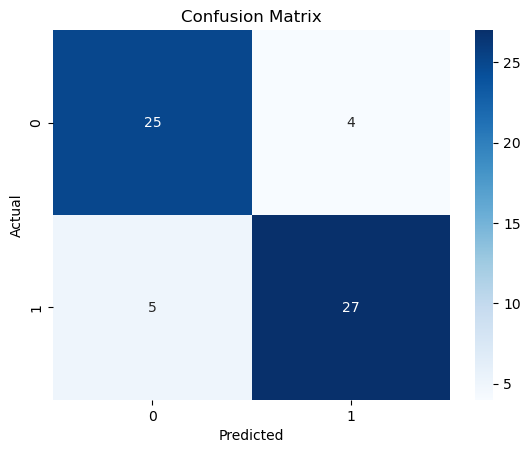

In [45]:
# Creating a confusion matrix
lcm = confusion_matrix(y_test,ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Observations
* Note : 0 represent people that do not have heart disease and 1 represent people that have heart disease.
* From the confusion matrix above Actual is 0 and predicted 25 correctly and Actual 1 predicted 27 with heart disease
* predicted 0, in Actual, 5 person has heart disease.

In [ ]:
# Model Building
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

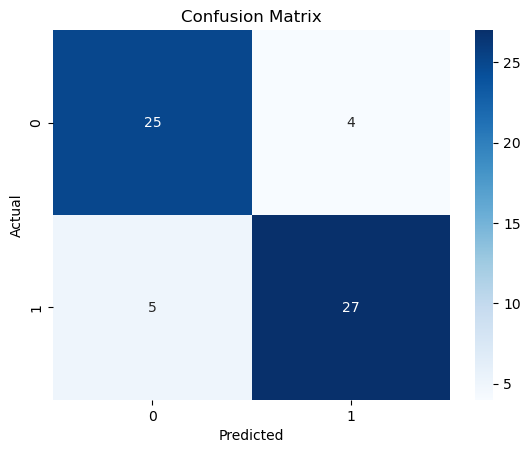

In [80]:
# Creating a confusion matrix for Random Forest
rcm = confusion_matrix(y_test,ly_pred)

# visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Observations
* Note : 0 represent people that do not have heart disease and 1 represent people that have heart disease.
* From the confusion matrix above Actual is 0  and predicted 25 correctly and Actual 1 predicted 27 with heart disease 

* predicted 0, in Actual, 5 person has heart disease.


In [75]:
# 8 Machine learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), "XGB Classifier"],
               [RandomForestClassifier(), "Random Forest"],
               [KNeighborsClassifier(), "K-Nearest Neighbours"],
               [SGDClassifier(),"SGD Classifier"],
               [SVC(),"SVC"],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state = 42), "Decision tree"],
               [LogisticRegression(), "Logistic regression"]
               ]

In [76]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTree

In [77]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])
    
    if model_name != classifiers[-1][1]:
       print('')

In [78]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['88.52%'],
 'K-Nearest Neighbours': ['75.41%'],
 'SGD Classifier': ['80.33%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic regression': ['85.25%']}

In [66]:
# convert acc_list to a table

print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic regression
0,81.97%,85.25%,75.41%,75.41%,65.57%,86.89%,85.25%,85.25%


In [67]:
# convert precision_list to a table

print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic regression
0,86.21%,84.85%,79.31%,86.96%,65.71%,90.0%,92.59%,87.1%


In [68]:
# convert Recall_Score_list to a table

print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic regression
0,78.12%,87.5%,71.88%,62.5%,71.88%,84.38%,78.12%,84.38%


In [69]:
# convert ROC_SCORE_list to a table

print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic regression
0,82.17%,85.13%,75.59%,76.08%,65.25%,87.02%,85.61%,85.29%
